# Chest X-Ray Images (Pneumonia) Classification

## Introduction
<br>By Ziv Ben Zvi and Julian Rubinstein

### The problem(option 1)


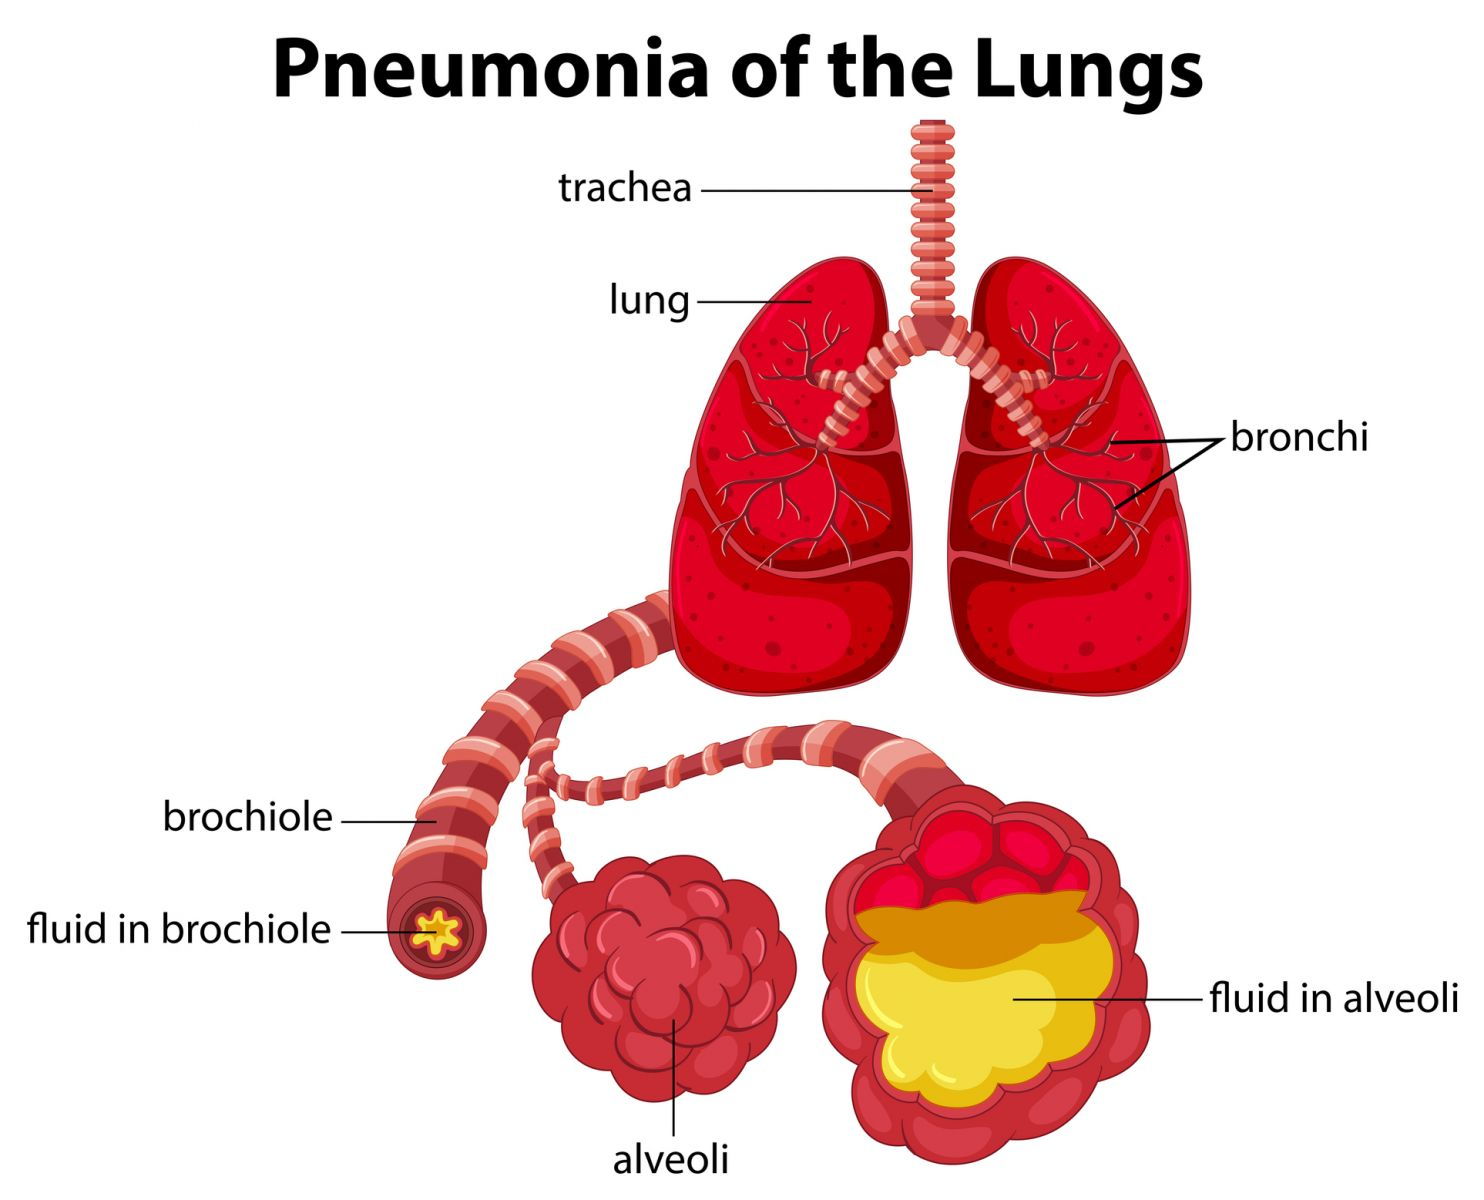

Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli. <br>Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing. The severity of the condition is variable.

Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases. <br>Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), sickle cell disease, asthma, diabetes, heart failure, a history of smoking, a poor ability to cough (such as following a stroke), and a weak immune system.<br> Diagnosis is often based on symptoms and physical examination. Chest X-rays, blood tests, and culture of the sputum may help confirm the diagnosis. <br>The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.



### The problem(option 2)

##### What is Pneumonia
Pneumonia is a lung infection that can range from mild to so severe that you have to go to the hospital.
<br>
It happens when an infection causes the air sacs in your lungs (your doctor will call them alveoli) to fill with fluid or pus. That can make it hard for you to breathe in enough oxygen to reach your bloodstream.
<br>
Anyone can get this lung infection. But infants younger than age 2 and people over age 65 are at higher risk. That’s because their immune systems might not be strong enough to fight it.
<br>
You can get pneumonia in one or both lungs. You can also have it and not know it. Doctors call this walking pneumonia. Causes include bacteria, viruses, and fungi. If your pneumonia results from bacteria or a virus, you can spread it to someone else.
<br>
###### Symptoms of Pneumonia
Your symptoms can vary depending on what’s causing your pneumonia, your age, and your overall health. They usually develop over several days.

###### Common pneumonia symptoms include:
1. Chest pain when you breathe or cough
2. Cough that produces phlegm or mucus
3. Fatigue and loss of appetite
4. Fever, sweating, and chills
5. Nausea, vomiting, and diarrhea
6. Shortness of breath<br>

###### Causes of Pneumonia
Bacteria, viruses, or fungi can cause pneumonia.<br>

##### Common causes include:

1. Flu viruses
2. Cold viruses
3. RSV virus (the top cause of pneumonia in babies age 1 or younger) 4, Bacteria called Streptococcus pneumoniae and Mycoplasma pneumoniae<br>

###### Pneumonia Diagnosis
Your doctor will start with questions about your symptoms and your medical history, like whether you smoke and whether you’ve been around sick people at home, school, or work. Then, they’ll listen to your lungs. If you have pneumonia, they might hear cracking, bubbling, or rumbling sounds when you breathe in.
<br><br>If your doctor thinks you might have pneumonia, they’ll probably give you tests, including:

1. Blood tests to look for signs of a bacterial infection
2. A chest X-ray to find the infection in your lungs and how far it’s spread
3. Pulse oximetry to measure the level of oxygen in your blood
4. A sputum test to check the fluid in your lungs for the cause of an infection


### About the data

We took a dataset from Kaggle which is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). <br>There are 5,863 X-Ray images (JPEG) and the data is divided into 3 categories:<br>
- Normal
- Pneumonia: Bacteria
- Pneumonia: Virus




Filenames follow the convention shown below:

{CONDITION} / {PATIENT_NUM}-{CAUSE}-{IMG_NUM}.jpeg

where CONDITION is one of the folders NORMAL, PNEUMONIA.
<br>CAUSE is one of BACTERIA, VIRUS in the image's name.

See the list below.

In [2]:
!ls chest_xray/train/PNEUMONIA/ | head -5

person1000_bacteria_2931.jpeg
person1000_virus_1681.jpeg
person1001_bacteria_2932.jpeg
person1002_bacteria_2933.jpeg
person1003_bacteria_2934.jpeg


ls: write error


### EDA

In [5]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import glob
import os

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
TRAIN_PATH = "chest_xray/train/"
TEST_PATH = "chest_xray/test/"
VALIDATION_PATH = "chest_xray/val/"

In [4]:
def get_img(path):
    return cv2.imread(path)

Let's extract the properties of the images and set them in a table:

In [48]:
### function to extract image's properties
def extract_image_props(img_path):
    img = get_img(img_path)
    height = int(img.shape[0])
    width = int(img.shape[1])
    condition = int(0)    
    return img_path, height, width, condition


### function to create Dataframe for NORMAL patients
def create_df_normal(df, folder_path, name):
    folder = []
    path = []
    hgt = []
    wdt = []
    cnd = []
    
    for img in glob.glob(os.path.join(folder_path, "NORMAL/*.jpeg")):
        folder.append(name)
        path.append(extract_image_props(img)[0])
        hgt.append(extract_image_props(img)[1])
        wdt.append(extract_image_props(img)[2])
        cnd.append(extract_image_props(img)[3])
        
    df['folder'] = folder
    df['img_path'] = path
    df['height'] = hgt
    df['width'] = wdt
    df['condition'] = cnd
    
    return df  


### function to create Dataframe for patients with PNEUMONIA from bacteria or virus
def create_df_sick(df, folder_path, name):
    folder = []
    path = []
    hgt = []
    wdt = []
    cnd = []
    
    for img in glob.glob(os.path.join(folder_path, "PNEUMONIA/*.jpeg")):
        condition = img.split('/')[-1].split('_')[1]
        if condition == 'bacteria':
            label = int(1) # for bacteria we set condition to 1
            
        elif condition == 'virus':
            label = int(2) # for virus we set condition to 2

        
        folder.append(name)
        path.append(extract_image_props(img)[0])
        hgt.append(extract_image_props(img)[1])
        wdt.append(extract_image_props(img)[2])
        cnd.append(label)
        
    df['folder'] = folder
    df['img_path'] = path
    df['height'] = hgt
    df['width'] = wdt
    df['condition'] = cnd
    
    return df  

##### This is our validation Dataframe:

In [78]:
val_normal = pd.DataFrame(columns=['folder','img_path', 'height', 'width', 'condition'])
val_sick = pd.DataFrame(columns=['folder','img_path', 'height', 'width', 'condition'])
val_normal = create_df_normal(val_normal, VALIDATION_PATH, 'val')
val_sick = create_df_sick(val_sick, VALIDATION_PATH, 'val')

In [92]:
val = pd.concat([val_normal, val_sick]).reset_index().drop(columns=['index'])

In [85]:
val

,folder,img_path,height,width,condition
0,val,chest_xray/val/NORMAL\NORMAL2-IM-1427-0001.jpeg,1416,1776,0
1,val,chest_xray/val/NORMAL\NORMAL2-IM-1430-0001.jpeg,1040,1272,0
2,val,chest_xray/val/NORMAL\NORMAL2-IM-1431-0001.jpeg,1416,1736,0
3,val,chest_xray/val/NORMAL\NORMAL2-IM-1436-0001.jpeg,928,1288,0
4,val,chest_xray/val/NORMAL\NORMAL2-IM-1437-0001.jpeg,1104,1240,0
5,val,chest_xray/val/NORMAL\NORMAL2-IM-1438-0001.jpeg,1104,1328,0
6,val,chest_xray/val/NORMAL\NORMAL2-IM-1440-0001.jpeg,1225,1632,0
7,val,chest_xray/val/NORMAL\NORMAL2-IM-1442-0001.jpeg,1302,1564,0
8,val,chest_xray/val/PNEUMONIA\person1946_bacteria_4...,592,968,1
9,val,chest_xray/val/PNEUMONIA\person1946_bacteria_4...,712,1072,1


##### This is our test Dataframe:

In [112]:
test_normal = pd.DataFrame(columns=['folder','img_path', 'height', 'width', 'condition'])
test_sick = pd.DataFrame(columns=['folder','img_path', 'height', 'width', 'condition'])
test_normal = create_df_normal(test_normal, TEST_PATH, 'test')
test_sick = create_df_sick(test_sick, TEST_PATH, 'test')

In [113]:
test = pd.concat([test_normal, test_sick]).reset_index().drop(columns=['index'])

In [90]:
test.head()

,folder,img_path,height,width,condition
0,test,chest_xray/test/NORMAL\IM-0001-0001.jpeg,1317,1857,0
1,test,chest_xray/test/NORMAL\IM-0003-0001.jpeg,1509,2111,0
2,test,chest_xray/test/NORMAL\IM-0005-0001.jpeg,1837,2031,0
3,test,chest_xray/test/NORMAL\IM-0006-0001.jpeg,1326,1663,0
4,test,chest_xray/test/NORMAL\IM-0007-0001.jpeg,1818,2053,0


In [91]:
test.iloc[260:265]

,folder,img_path,height,width,condition
260,test,chest_xray/test/PNEUMONIA\person109_bacteria_5...,640,952,1
261,test,chest_xray/test/PNEUMONIA\person109_bacteria_5...,576,1088,1
262,test,chest_xray/test/PNEUMONIA\person109_bacteria_5...,536,968,1
263,test,chest_xray/test/PNEUMONIA\person109_bacteria_5...,736,1322,1
264,test,chest_xray/test/PNEUMONIA\person10_virus_35.jpeg,1136,1488,2


##### Condition's distribution plot (normal = 0, bacteria = 1, virus = 2  , in each folder train/test)

###### ....

Before we start, let's take a look at the images we have:

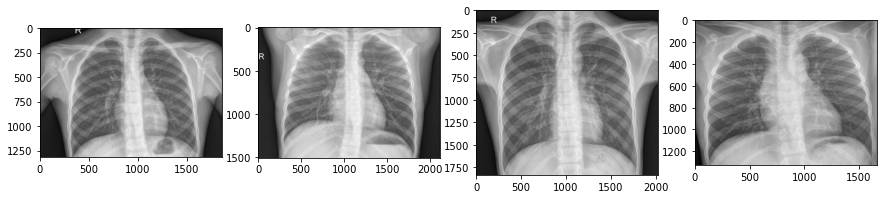

In [136]:
plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots(1,4)
for i in range(4):
    img = cv2.imread(test['img_path'].iloc[i])
    ax[i].imshow(img)

plt.show()

In [108]:
img = cv2.imread(test['img_path'].iloc[0])
img.shape

(1317, 1857, 3)

By examine one of our images we see the image's dimensions are: height:1317, width:1857, color:RGB
<br>What's most interesting is that the color of the image is RGB eventhough the image looks in grayscale.
<br>In order to use our data correctly we will convert all RGB images to grayscale.


##### Check how many RGB images we have and build a function to convert to grayscale

Show that all images are in RGB format

then convert:

In [ ]:
# CONVERT TO GREYSCALE

normal_image = normal_data[0]
gray_image = cv2.cvtColor(normal_image, cv2.COLOR_BGR2GRAY)

cv2.imshow("Image before conversion", normal_image) 
cv2.imshow("Image after conversion", gray_image) 

print("Before conversion shape: " + str(normal_data[0].shape))
print("After conversion shape: " + str(gray_image.shape))
# TODO: Hardly affects size?

for index, image in enumerate(normal_data):
    normal_data[index] = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
for index, image in enumerate(sick_data):
    sick_data[index] = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


##### Dimension's distribution plot (height, width, color)

The dimensions of our images are not equal, therefore in order to use the data we will have to address it by reshape all images to one size or any other solution we can come up with.
<br>We will do it later when we start working with the data.

##### Images by condition

In [122]:
temp_normal = test.loc[test['condition'] == 0]
temp_bacteria = test.loc[test['condition'] == 1]
temp_virus = test.loc[test['condition'] == 2]

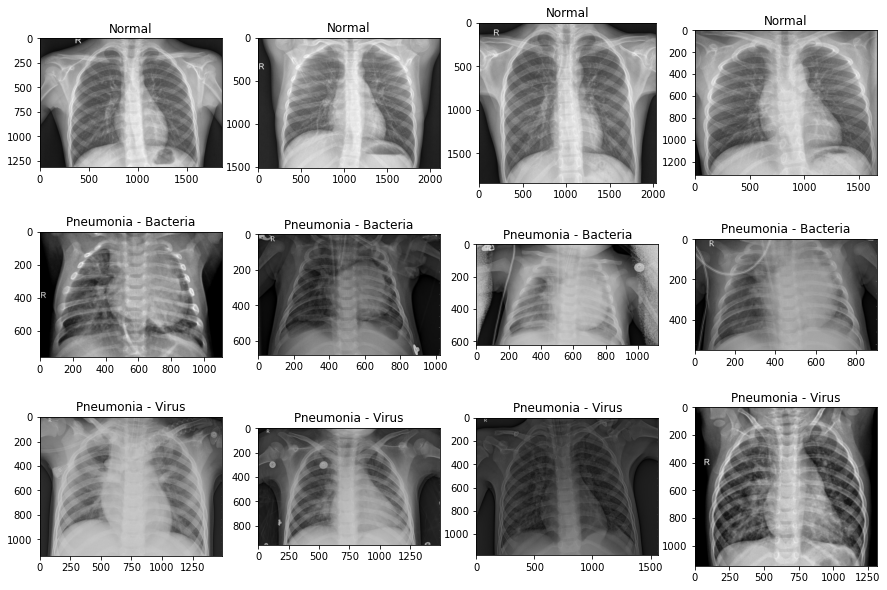

In [135]:
fig, ax = plt.subplots(3,4)

for i in range(4):
    n_img = cv2.imread(temp_normal['img_path'].iloc[i])
    ax[0,i].imshow(n_img)
    ax[0,i].set_title('Normal')

    b_img = cv2.imread(temp_bacteria['img_path'].iloc[i])
    ax[1,i].imshow(b_img)
    ax[1,i].set_title('Pneumonia - Bacteria')
    
    v_img = cv2.imread(temp_virus['img_path'].iloc[i])
    ax[2,i].imshow(v_img)
    ax[2,i].set_title('Pneumonia - Virus')
    
plt.show()

### Feature reduction

### Feature extraction

### Create ML models

### Create Neural network model

In [ ]:

# COMPRESS
for index, image in enumerate(normal_data):
    normal_data[index] = cv2.resize(image, (170,120))
    
for index, image in enumerate(sick_data):
    sick_data[index] = cv2.resize(image, (170,120))
    

# NORMALIZE VALUES
for index, image in enumerate(normal_data):
    normal_data[index] = image / 255
    
for index, image in enumerate(sick_data):
    sick_data[index] = image / 255


# CREATE Y [0,1]
    
normal_Y = [0]*len(normal_data)
sick_Y = [1]*len(sick_data)

# [sick, sick, sick, normal]
# [1, 1, 1, 0]


for index, image in enumerate(normal_data):
    normal_data[index] = image.flatten()
    
for index, image in enumerate(sick_data):
    sick_data[index] = image. flatten()

train_images = np.array(normal_data + sick_data)
images_labels = np.array(to_categorical(normal_Y + sick_Y))
X_train, X_test, y_train, y_test = train_test_split(train_images, images_labels, test_size=0.2)



model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(20400,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=30,
                    verbose=1,
                    shuffle=True,
                    validation_data=(X_test, y_test))


score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



#LR_reduce=keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
#                            factor=.5,
#                            patience=10,
#                            min_lr=.000001,
#                            verbose=0)
#
#ES_monitor=keras.callbacks.EarlyStopping(monitor='val_loss',
#                          patience=20)

# FIT INTO MODEL
#
#
#model = Sequential()
#model.add(Conv2D(32, (3, 3), input_shape=(3, 150, 150)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#
#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))